# **Project: Tweets Sentiment Analysis**

# **Dataset**

Before running the notebook, please make sure to upload **Sentiment140.tenPercent.sample.tweets.tsv** from moodle.

## **Importing**

In [6]:
import pandas as pd

# Load the dataset to understand its structure
file_path = 'Sentiment140.tenPercent.sample.tweets.tsv'
data = pd.read_csv(file_path, delimiter='\t', header=None)
# Display the first few rows of the dataset to understand its structure
data.head()

,0,1
0,sentiment_label,tweet_text
1,4,"@elephantbird Hey dear, Happy Friday to You A..."
2,4,Ughhh layin downnnn Waiting for zeina to co...
3,0,"@greeniebach I reckon he'll play, even if he's..."
4,0,@vaLewee I know! Saw it on the news!


In [7]:
data.shape

(160001, 2)

## **Naming columns**

In [8]:
# Remove the first row, and name the columns appropriately
data = data.iloc[1:]
data.columns = ["sentiment_label", "tweet_text"]
data.head()

,sentiment_label,tweet_text
1,4,"@elephantbird Hey dear, Happy Friday to You A..."
2,4,Ughhh layin downnnn Waiting for zeina to co...
3,0,"@greeniebach I reckon he'll play, even if he's..."
4,0,@vaLewee I know! Saw it on the news!
5,0,very sad that http://www.fabchannel.com/ has c...


# **Data Preprocessing**

## **Binary Encoding**

In [24]:
data['sentiment_label'] = data['sentiment_label'].astype(int).replace(4, 1)
data.head()

,sentiment_label,tweet_text
1,1,"@elephantbird Hey dear, Happy Friday to You A..."
2,1,Ughhh layin downnnn Waiting for zeina to co...
3,0,"@greeniebach I reckon he'll play, even if he's..."
4,0,@vaLewee I know! Saw it on the news!
5,0,very sad that http://www.fabchannel.com/ has c...


## **Removing Usernames**

In [25]:
import re

def remove_usernames(text):
    text = re.sub(r'@\w+', '', text)
    return text

data['tweet_text'] = data['tweet_text'].apply(remove_usernames)
data.head()

,sentiment_label,tweet_text
1,1,"Hey dear, Happy Friday to You Already had yo..."
2,1,Ughhh layin downnnn Waiting for zeina to co...
3,0,"I reckon he'll play, even if he's not 100%......"
4,0,I know! Saw it on the news!
5,0,very sad that http://www.fabchannel.com/ has c...


## **Removing URLs**

In [26]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"


def remove_urls(text):
    text = re.sub(urlPattern, "website", text)
    return text

data['tweet_text'] = data['tweet_text'].apply(remove_urls)
data.head()

,sentiment_label,tweet_text
1,1,"Hey dear, Happy Friday to You Already had yo..."
2,1,Ughhh layin downnnn Waiting for zeina to co...
3,0,"I reckon he'll play, even if he's not 100%......"
4,0,I know! Saw it on the news!
5,0,very sad that website has closed down. One of ...


## **Remove Non-Alphabetic Characters**

In [27]:
def remove_non_alphabets(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

data['tweet_text'] = data['tweet_text'].apply(remove_non_alphabets)
data.head()

,sentiment_label,tweet_text
1,1,Hey dear Happy Friday to You Already had you...
2,1,Ughhh layin downnnn Waiting for zeina to co...
3,0,I reckon hell play even if hes not but i know...
4,0,I know Saw it on the news
5,0,very sad that website has closed down One of t...


## **Removing Extra Spaces**

In [28]:
def remove_extra_spaces(text):
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

data['tweet_text'] = data['tweet_text'].apply(remove_extra_spaces)
data.head()

,sentiment_label,tweet_text
1,1,Hey dear Happy Friday to You Already had your ...
2,1,Ughhh layin downnnn Waiting for zeina to cook ...
3,0,I reckon hell play even if hes not but i know ...
4,0,I know Saw it on the news
5,0,very sad that website has closed down One of t...


## **Convert words to lower case**

In [29]:
def lower(text):
    text = text.lower()
    return text

data['tweet_text'] = data['tweet_text'].apply(lower)
data.head()

,sentiment_label,tweet_text
1,1,hey dear happy friday to you already had your ...
2,1,ughhh layin downnnn waiting for zeina to cook ...
3,0,i reckon hell play even if hes not but i know ...
4,0,i know saw it on the news
5,0,very sad that website has closed down one of t...


## **Removing Consecutive Letters**



In [30]:
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

def remove_consecutive_letter(text):
  text = re.sub(sequencePattern, seqReplacePattern, text)
  return text

data['tweet_text'] = data['tweet_text'].apply(remove_consecutive_letter)
data.head()

,sentiment_label,tweet_text
1,1,hey dear happy friday to you already had your ...
2,1,ughh layin downn waiting for zeina to cook bre...
3,0,i reckon hell play even if hes not but i know ...
4,0,i know saw it on the news
5,0,very sad that website has closed down one of t...


## **Lemmatization**

In [31]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

# Download necessary NLTK datasets
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Function for lemmatizing a sentence
def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    # Tokenize the sentence
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # Map nltk tag to wordnet tag
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # If there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            # Else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

data['tweet_text'] = data['tweet_text'].apply(lemmatize_sentence)
data.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,sentiment_label,tweet_text
1,1,hey dear happy friday to you already have your...
2,1,ughh layin downn wait for zeina to cook breakfast
3,0,i reckon hell play even if he not but i know n...
4,0,i know saw it on the news
5,0,very sad that website have close down one of t...


## **TF IDF Vectorization**

In [32]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet_text'], data['sentiment_label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)

X_train_vec = vectorizer.transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

# **Predictive Model**

## **Helper Functions**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def display_accuracy(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  # Visualize the accuracy
  plt.figure(figsize=(6, 4))
  sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues_d')
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.ylim(0, 1)  # Set y-axis limits to show percentage from 0 to 100%
  plt.axhline(y=accuracy, color='blue', linestyle='--')
  plt.text(0, accuracy, f'{accuracy:.2f}', color='blue', va='bottom', ha='center')
  plt.show()

def display_confusion_matrix(y_test, y_pred):
  conf_matrix = confusion_matrix(y_test, y_pred)
  # Visualize the confusion matrix using a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
              xticklabels=['Negative (Pred)', 'Positive (Pred)'],
              yticklabels=['Negative (True)', 'Positive (True)'])
  plt.title('Confusion Matrix for Logistic Regression Model')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

def display_classification_report(y_test, y_pred):
  # Prepare data for the classification report heatmap
  report_dict = classification_report(y_test, y_pred, output_dict=True)
  report_df = pd.DataFrame(report_dict).transpose().round(2)

  # Remove the 'support' column to focus on precision, recall, f1-score
  report_df = report_df.drop(columns=['support'])
  # Visualize the classification report
  plt.figure(figsize=(8, 6))
  sns.heatmap(report_df.iloc[:-3, :], annot=True, cmap='Blues', fmt='g', cbar=True)  # Exclude last 3 rows (accuracy, macro avg, weighted avg)
  plt.title('Classification Report')
  plt.ylabel('Class')
  plt.xlabel('Metrics')
  plt.show()

## **Logistic Regression**

**Overview:** Logistic Regression is a fundamental statistical approach that models the probability of a binary outcome based on one or more independent variables. It's particularly well-suited for binary classification problems.
Advantages:

**Interpretability:** Logistic regression coefficients can be easily interpreted in terms of the odds ratios, making it straightforward to understand the effect of each feature on the likelihood of subscription.

**Efficiency:** It's computationally inexpensive and provides quick predictions after the model has been fit.

**Performance:** Despite its simplicity, logistic regression can perform remarkably well on linearly separable problems.

**Considerations:** It assumes a linear relationship between the log-odds of the dependent variable and the independent variables. It might not capture complex relationships as effectively as more sophisticated models.

### **Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_vec)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Accuracy**

<ipython-input-14-95f276f0236f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues_d')


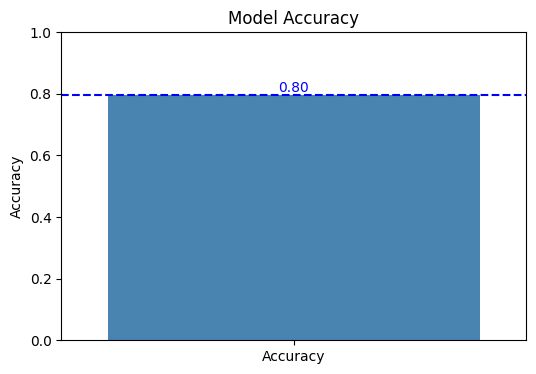

In [ ]:
display_accuracy(y_test, y_pred)

### **Confusion Matrix**

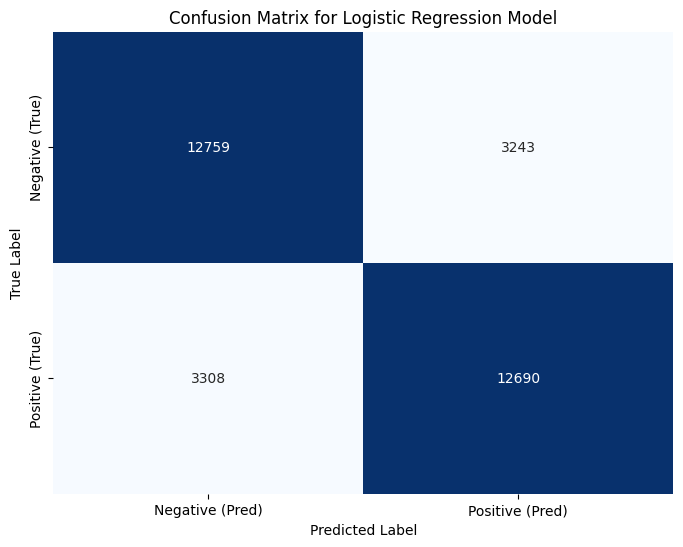

In [ ]:
display_confusion_matrix(y_test, y_pred)

### **Classification Report**

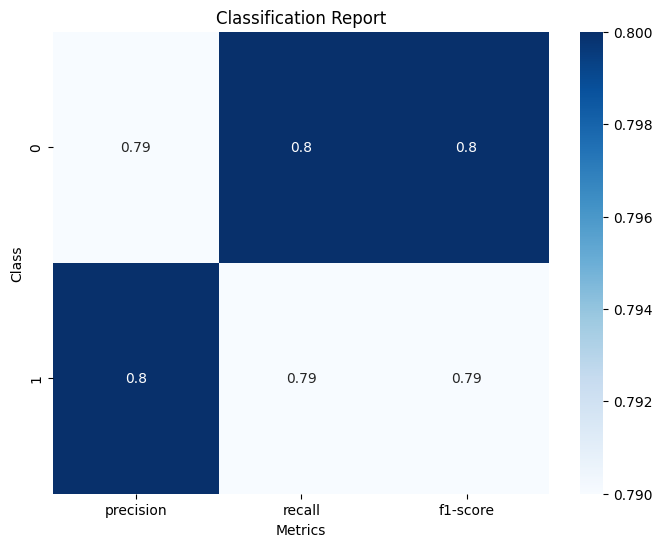

In [ ]:
display_classification_report(y_test, y_pred)

## **LSTM**

**Overview:** Long Short-Term Memory (LSTM) is an advanced type of Recurrent Neural Network (RNN) architecture designed to handle the vanishing and exploding gradient problems associated with traditional RNNs. LSTMs are particularly adept at learning long-term dependencies and are widely used in sequence prediction problems, such as natural language processing, speech recognition, and time series analysis.

**Advantages:**

**Long-term Dependency Learning:** LSTMs are specifically designed to address and learn long-term dependencies, making them highly effective for tasks involving sequential data where the context or state needs to be maintained over long sequences.

**Flexibility:** They can process not only single data points (such as images) but also entire sequences of data (such as speech or video). This makes them versatile for a variety of tasks in different domains.

**Gate Mechanisms:** The unique architecture of LSTMs, with its forget, input, and output gates, allows for better control over the flow of information, enhancing the model's ability to learn from data.

**Considerations:**

**Complexity:** LSTMs involve a more complex architecture compared to traditional RNNs, which can lead to longer training times and the need for more computational resources.

**Overfitting:** Due to their capacity and complexity, LSTMs are more prone to overfitting, especially with smaller datasets. Regularization techniques and dropout are commonly employed to mitigate this issue.

**Parameter Tuning:** The performance of LSTM models can be highly sensitive to the configuration of hyperparameters, necessitating thorough tuning, which can be time-consuming and computationally expensive.

### **Training**

In [34]:
MAX_SEQUENCE_LENGTH = 30

In [35]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [36]:
from keras.preprocessing.sequence import pad_sequences

# Assuming you have already initialized and fitted a tokenizer on your training data
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=MAX_SEQUENCE_LENGTH)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=MAX_SEQUENCE_LENGTH)

In [37]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,  # Vocabulary size
                    output_dim=30,  # Embedding size
                    input_length=MAX_SEQUENCE_LENGTH))  # Maximum length of an input sequence
model.add(LSTM(128, return_sequences=False))  # LSTM layer with 128 units
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

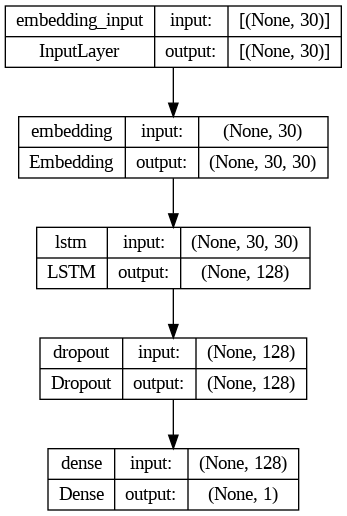

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_seq, y_train,
                    batch_size=8,
                    epochs=5,
                    validation_split=0.2)

Epoch 1/5
12800/12800 [==============================] - 566s 44ms/step - loss: 0.4850 - accuracy: 0.7688 - val_loss: 0.4496 - val_accuracy: 0.7914
Epoch 2/5
12800/12800 [==============================] - 562s 44ms/step - loss: 0.3982 - accuracy: 0.8214 - val_loss: 0.4498 - val_accuracy: 0.7896
Epoch 3/5
12800/12800 [==============================] - 560s 44ms/step - loss: 0.3356 - accuracy: 0.8551 - val_loss: 0.4776 - val_accuracy: 0.7855
Epoch 4/5
12800/12800 [==============================] - 566s 44ms/step - loss: 0.2799 - accuracy: 0.8825 - val_loss: 0.5134 - val_accuracy: 0.7779
Epoch 5/5
12800/12800 [==============================] - 562s 44ms/step - loss: 0.2295 - accuracy: 0.9064 - val_loss: 0.5612 - val_accuracy: 0.7718


In [ ]:
loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f'Test Accuracy: {accuracy}')

1000/1000 [==============================] - 16s 16ms/step - loss: 0.5610 - accuracy: 0.7737
Test Accuracy: 0.7737187743186951


In [ ]:
import numpy as np
y_pred_rf = model.predict(X_test_seq)


1000/1000 [==============================] - 23s 23ms/step


In [ ]:
binary_predictions = (y_pred_rf > 0.5)
binary_predictions = binary_predictions.astype(int)

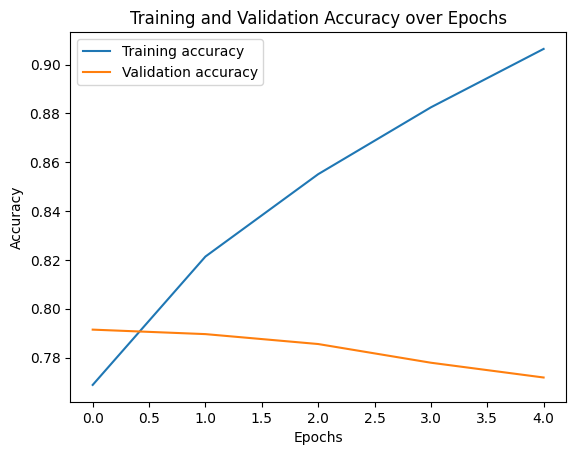

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Accuracy**

<ipython-input-14-95f276f0236f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues_d')


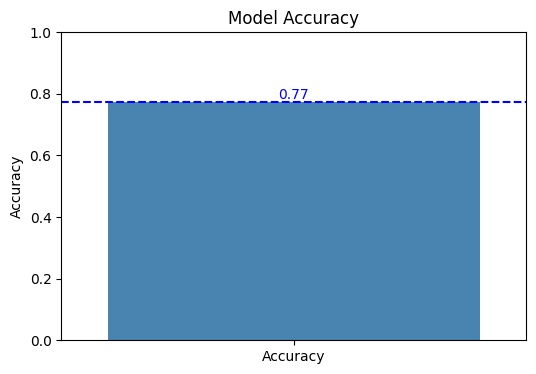

In [ ]:
display_accuracy(y_test, binary_predictions)

### **Confusion Matrix**

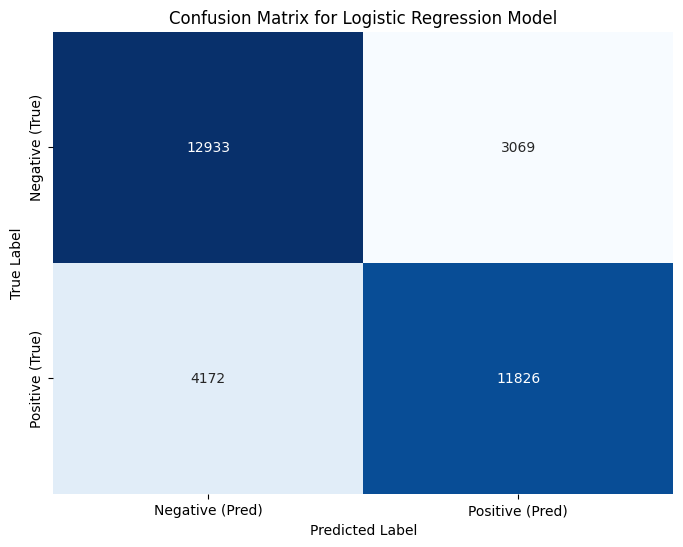

In [ ]:
display_confusion_matrix(y_test, binary_predictions)

### **Classification Report**

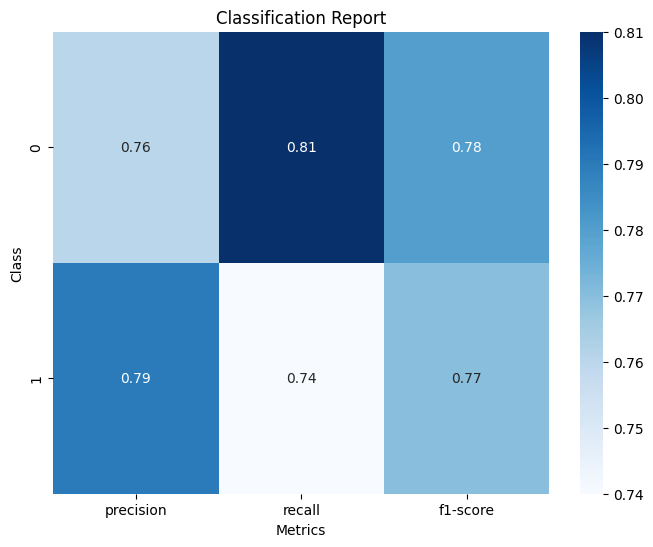

In [ ]:
display_classification_report(y_test, binary_predictions)

# **Results and Insights**

A simpler classical machine learning model (logistic regression) outperformed LSTM due to having a **small dataset**. Overfitting of LSTM shows there is still room for improvement for better **regularization**.